In [1]:
from utils.json2numpy import json2numpy
json2numpy("dataset/train.json", "dataset/train/imgs", "dataset/train/masks")

In [2]:
import cv2
import glob
import numpy as np
import os.path as osp
import matplotlib.pyplot as plt
from utils.compute_iou import compute_ious
from main import segment_fish

In [3]:
data_root = osp.join("dataset", "train", "imgs")
img_paths = glob.glob(osp.join(data_root, "*.jpg"))
mask_dir = osp.join("dataset", "train", "masks")
print(f"Количество изображений для обработки: {len(img_paths)}")

Количество изображений для обработки: 5


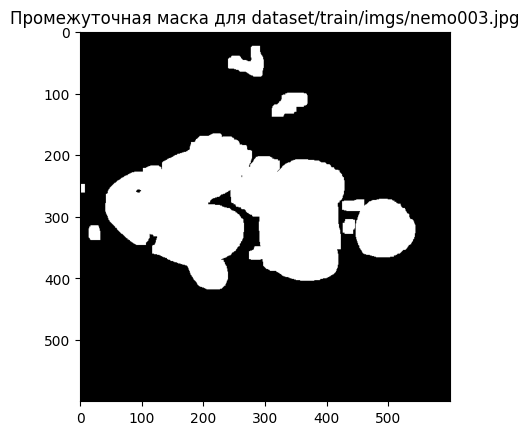

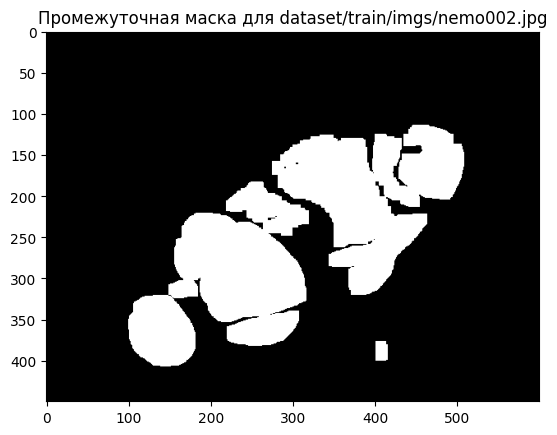

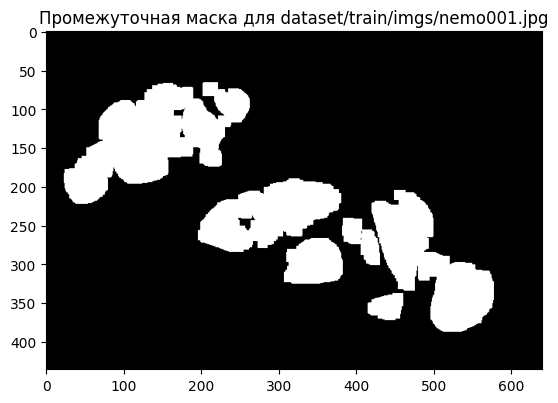

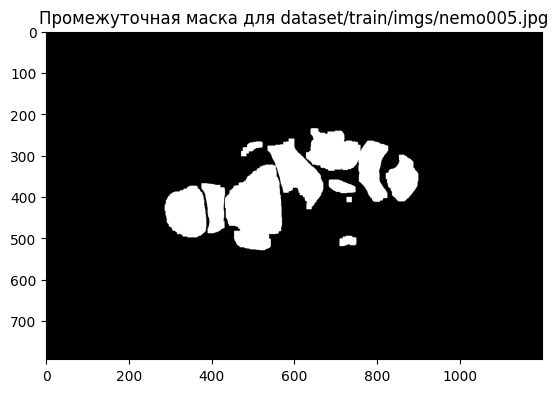

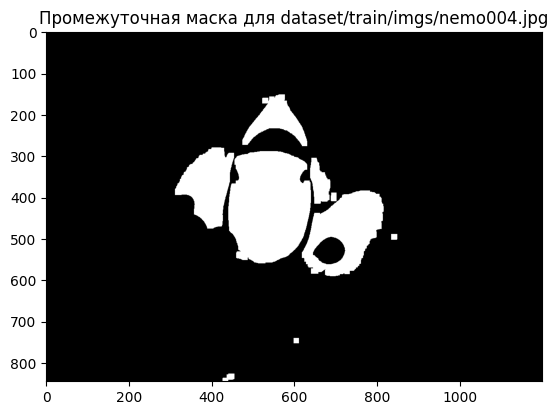

In [4]:
# Хранение масок
masks = dict()

for path in img_paths:
    img = cv2.imread(path)

    # Проверка загрузки изображения
    if img is None:
        print(f"Не удалось загрузить изображение: {path}")
        continue

    # Выполняем сегментацию
    mask = segment_fish(img)

    # Проверка маски
    if mask is None:
        print(f"Не удалось получить маску для изображения: {path}")
        continue

    # Визуализация промежуточных масок
    plt.imshow(mask, cmap='gray')
    plt.title(f"Промежуточная маска для {path}")
    plt.show()

    # Сохранение маски
    masks[osp.basename(path)] = mask

(600, 600) 0.8197953253906204


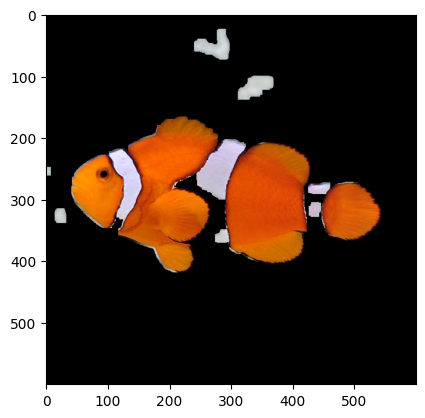

(450, 600) 0.7788754929569328


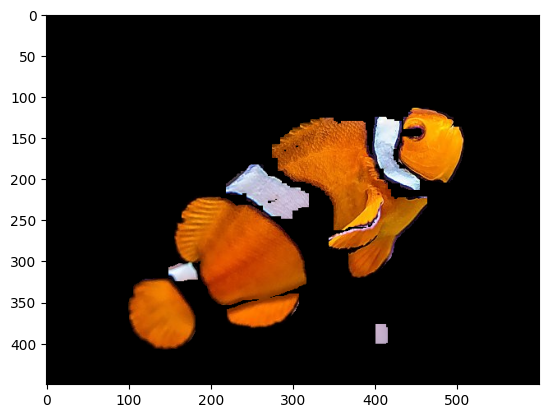

(436, 640) 0.739751842509241


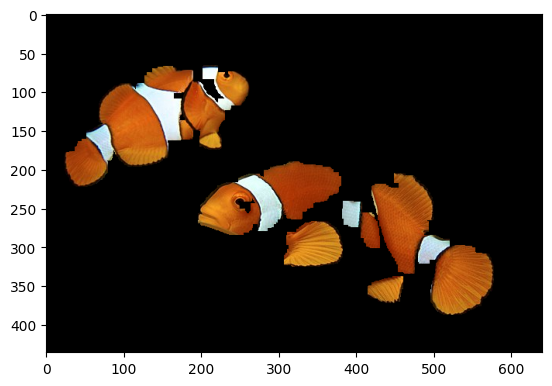

(793, 1200) 0.6995537838890997


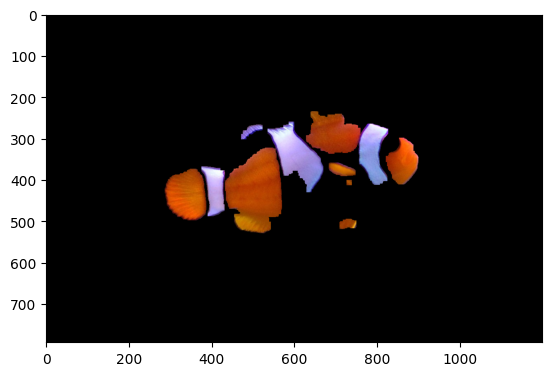

(845, 1200) 0.7107553353086082


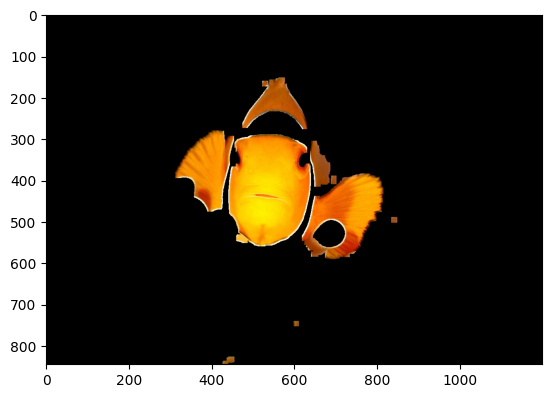

In [5]:
masks = dict()
for path in img_paths:
    img = cv2.imread(path)
    mask = segment_fish(img)
    masks[osp.basename(path)] = mask
    print(mask.shape, compute_ious(masks, osp.join("dataset", "train", "masks")))
    img = np.where(mask[:,:,None], img, np.zeros_like(img))
    plt.imshow(img[:,:,::-1])
    plt.show()

In [6]:
for path in img_paths:
    img = cv2.imread(path)
    
    # Выполняем сегментацию
    mask = segment_fish(img)

    # Сохраняем предсказанную маску
    masks[osp.basename(path)] = mask

# Вычисляем IoU между предсказанными и истинными масками
iou_score = compute_ious(masks, mask_dir)
print(f"Средний IoU на обучающих данных: {iou_score}")

Средний IoU на обучающих данных: 0.7107553353086082
